In [1]:
import os
import pandas as pd

meta_data_root_dir = '/workspace/repo/cccrawl/data/top50_q5_images/'
meta_data_flies = os.listdir(meta_data_root_dir)
meta_data_flies = [os.path.join(meta_data_root_dir, f) for f in meta_data_flies if f.endswith('.csv')]

print(len(meta_data_flies))




211


In [11]:
meta_data_flies[:5]

['/workspace/repo/cccrawl/data/top50_q5_images/meta_data_1to2.csv',
 '/workspace/repo/cccrawl/data/top50_q5_images/meta_data_0to1.csv',
 '/workspace/repo/cccrawl/data/top50_q5_images/meta_data_229to230.csv',
 '/workspace/repo/cccrawl/data/top50_q5_images/merged_meta_data.csv',
 '/workspace/repo/cccrawl/data/top50_q5_images/meta_data_100to101.csv']

In [16]:
start_index = [int(flie_name.split('to')[-1].split('.')[0]) for flie_name in meta_data_flies if 'merged' not in flie_name]

In [20]:
start_index = sorted(start_index)
for i in range(1, len(start_index)):
	if start_index[i] - start_index[i-1] != 1:
		print(start_index[i-1], start_index[i])

2 4
14 17
18 20
24 27
30 36
39 41
56 58
60 64
64 71
82 84
86 88
93 95
99 101
104 106
116 118
136 138
147 149
158 160
164 166
170 172
174 176
176 178
183 185
189 191
198 200
209 211
228 230


In [7]:
merged_meta_data_df = None
for meta_data_file in meta_data_flies:
	sub_df = pd.read_csv(meta_data_file)
	if merged_meta_data_df is None:
		merged_meta_data_df = sub_df
	else:
		merged_meta_data_df = pd.concat([merged_meta_data_df, sub_df])



merged_meta_data_df.to_csv('/workspace/repo/cccrawl/data/top50_q5_images/merged_meta_data.csv', index=False)

{'Unnamed: 0': 0,
 '0': "{'name': 'How to Customize the Ribbon in Microsoft Word (and other Office apps)', 'thumbnailUrl': 'https://tse3.mm.bing.net/th?id=OIP.gkiSLabH7AsQl2vMIAM46gHaDs&pid=Api', 'contentUrl': 'https://winbuzzer.com/wp-content/uploads/2021/05/Microsoft-Word-Ribbon.jpg', 'hostPageUrl': 'https://winbuzzer.com/2021/05/19/how-to-customize-the-ribbon-in-microsoft-word-powerpoint-excel-and-outlook-xcxwbt/', 'width': 1304, 'height': 650, 'image_path': '/mnt/vground/bing_search_data/top50_q5_images/image/00_00_01/Microsoft-Word-Ribbon.jpg', 'image_name': 'Microsoft-Word-Ribbon.jpg', 'score': 0.9986182451248169, 'cate': 'office_and_productivity', 'app': 'microsoft_word', 'query': 'Microsoft_Word_ribbon_menu_interface'}",
 '1': "{'name': 'MS-Word Ribbon and Tabs', 'thumbnailUrl': 'https://tse4.mm.bing.net/th?id=OIP.yPkUl2-oFZeFM-ugxGHYOwHaDl&pid=Api', 'contentUrl': 'https://www.sitesbay.com/word/images/ribbon-in-word.png', 'hostPageUrl': 'https://www.sitesbay.com/word/word-ribbo

In [36]:
dict(merged_meta_data_df.head(1))

{'Unnamed: 0': 0    0
 Name: Unnamed: 0, dtype: int64,
 '0': 0    {'name': 'How to Customize the Ribbon in Micro...
 Name: 0, dtype: object,
 '1': 0    {'name': 'MS-Word Ribbon and Tabs', 'thumbnail...
 Name: 1, dtype: object,
 '2': 0    {'name': 'WordTips (ribbon interface) FAQ (Mic...
 Name: 2, dtype: object,
 '3': 0    {'name': 'How To Customize The Ribbon In Micro...
 Name: 3, dtype: object,
 '4': 0    {'name': '5 Quick Tips For Word 2007 - Success...
 Name: 4, dtype: object,
 '5': 0    {'name': '2022 Microsoft Word Menu Bars', 'thu...
 Name: 5, dtype: object,
 '6': 0    {'name': 'What is the Ribbon in Microsoft Word...
 Name: 6, dtype: object,
 '7': 0    {'name': 'How to Use the Ribbon in Word 2016 -...
 Name: 7, dtype: object,
 '8': 0    {'name': 'Customize the ribbon in Word - Word'...
 Name: 8, dtype: object,
 '9': 0    {'name': 'How to Customize the Ribbon in Micro...
 Name: 9, dtype: object,
 '10': 0    {'name': 'Hướng dẫn toàn tập Word 2016 (Phần 1...
 Name: 10, dtype: objec

In [27]:
for index in range(len(merged_meta_data_df)):
	print(merged_meta_data_df.loc[index])
	break

    Unnamed: 0                                                  0  \
0            0  {'name': 'How to Customize the Ribbon in Micro...   
0            0  {'name': 'Microsoft Is Making One More PowerTo...   
0            0  {'name': 'Microsoft 365 Word user interface on...   
0            0  {'name': "Steam's new Library UI is now availa...   
0            0  {'name': 'Steam Website Layout & Gaming Client...   
..         ...                                                ...   
0            0  {'name': 'Final Cut Pro X : Full Timeline Work...   
0            0  {'name': 'How to apply special effects to your...   
0            0  {'name': 'Color correcting video in final cut ...   
0            0  {'name': 'Adjust Audio Levels in Final Cut Pro...   
0            0  {'name': 'How to Create Chart in Excel - Excel...   

                                                    1  \
0   {'name': 'MS-Word Ribbon and Tabs', 'thumbnail...   
0   {'name': 'Microsoft PowerToys Keyboard Manager...   


In [70]:
def get_file_name(index):
	return f'/workspace/repo/cccrawl/data/top50_q5_images/meta_data_{index}to{index+1}.csv'

def convert_meta_data(row):
	meta_list= []
	for key, value in row.items():
		if "Unnamed" in key:
			continue
		meta_list.append(eval(value))

	return meta_list

In [74]:
failed_index = []
result_dict = {}
for index in range(250):
	try:
		example_meta_file = get_file_name(index)
		example = pd.read_csv(example_meta_file)
		result_dict[index] = convert_meta_data(example.loc[0])
	except:
		failed_index.append(index)

In [78]:
len(failed_index)
save_file = '/workspace/repo/cccrawl/tmp/top50_q5_images_failed_index.txt'
with open(save_file, 'w') as f:
	for index in failed_index:
		f.write(str(index) + '\n')

In [79]:
# save result_dict to pickle
import pickle
save_file = '/workspace/repo/cccrawl/tmp/top50_q5_images_result_dict_210.pkl'
with open(save_file, 'wb') as f:
	pickle.dump(result_dict, f)




In [80]:
loaded_result = pickle.load(open(save_file, 'rb'))

In [82]:
loaded_result.keys()

dict_keys([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 19, 20, 21, 22, 23, 26, 27, 28, 29, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 63, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 171, 172, 173, 175, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249])

In [89]:
' '.join([str(i) for i in failed_index])

'2 14 15 18 24 25 30 31 32 33 34 39 56 60 61 62 64 65 66 67 68 69 82 86 93 99 104 116 136 147 158 164 170 174 176 183 189 198 209 228'

In [92]:
loaded_result = pickle.load(open(save_file, 'rb'))

merged_list = []

for key, value in loaded_result.items():
	merged_list.extend(value)

len(merged_list)

merged_list[0].keys()

dict_keys(['name', 'thumbnailUrl', 'contentUrl', 'hostPageUrl', 'width', 'height', 'image_path', 'image_name', 'score', 'cate', 'app', 'query'])

In [93]:
scorelist = [item['score'] for item in merged_list]

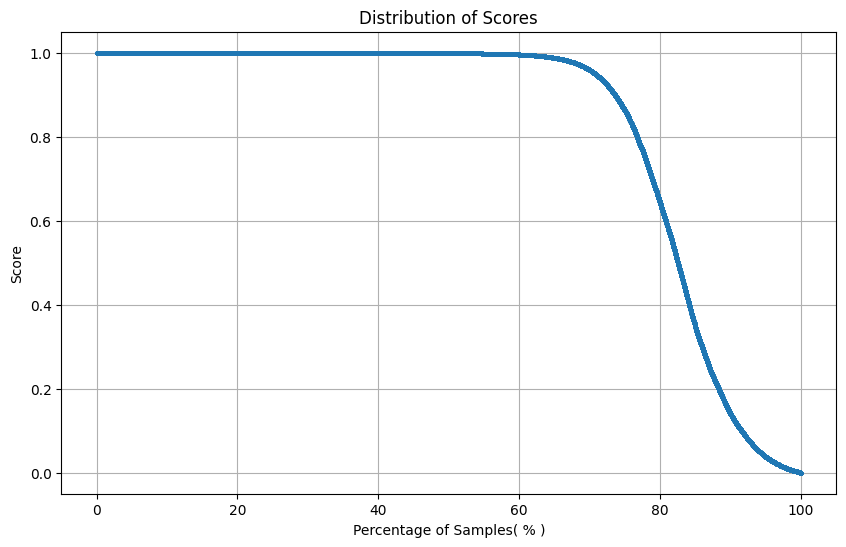

In [101]:
import matplotlib.pyplot as plt

# 对 scorelist 进行排序
sorted_scorelist = sorted(scorelist)

percentage = [i*100/len(sorted_scorelist) for i in range(len(sorted_scorelist))]
# 绘制分布图
plt.figure(figsize=(10, 6))
plt.plot(percentage, sorted_scorelist[::-1], marker='o', markersize=2)
plt.xlabel('Percentage of Samples( % )')
plt.ylabel('Score')
plt.title('Distribution of Scores')
plt.grid(True)
plt.show()